## What is Numpy?
Numpy is a python library that makes it easier to work with numerical algorithms in python.

## Why do we want to use Numpy for working with data?
Numpy makes it easy to perform operations on the scale of _N-d arrays_ of data.

### Example 1: Adding one to every element of the list

First, we make a list with `n_lst` sequential integers

In [1]:
n_lst = 10
lst = list(range(n_lst))

print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Then add one to each element the straightforward way, with a loop.

In [2]:
augListClassic = lst.copy()
for i in range(len(lst)):
    augListClassic[i] += 1
    
print(augListClassic)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In python we can do this in several different ways, e.g. using a list comprehension:

In [3]:
augListComprehension = [x+1 for x in lst]

print(augListComprehension)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Numpy allows us to implicitly perform operations on entire arrays as if these arrays were values

In [121]:
# When we use Numpy, we need to import the module first. 
# We give it the alias "np" which is fairly common.
import numpy as np 

# We will copy our python list into a Numpy "array" data structure.
npArry = np.array(lst)
augNpArry = npArry + 1

print(augNpArry)

[ 1  2  3  4  5  6  7  8  9 10]


### Example 2: Logical indexing
Note that Jupyter maintains the state of the underlying python environment, i.e. libraries as well as variables, are maintained across cells. So we don't need to import Numpy again unless we restart the notebook.

In [122]:
lstTri = lst.copy()
for i in range(len(lst)):
    if lst[i] > 5:
        lstTri[i] = 10-lst[i]
        
print(lstTri)

[0, 1, 2, 3, 4, 5, 4, 3, 2, 1]


Now the same thing using Numpy,

In [123]:
npArryTri = npArry.copy()
# Create an index vector
idx = npArry > 5
npArryTri[idx] = 10-npArry[idx] 

print('Index vector: ', idx)
print("Sub-array we're working with:", npArry[idx])
print('Result:', npArryTri)

Index vector:  [False False False False False False  True  True  True  True]
Sub-array we're working with: [6 7 8 9]
Result: [0 1 2 3 4 5 4 3 2 1]


### Example 2.5: Making useful test cases 

It is often very helpful to generate small test examples first, before performing operations on real data. Software engineers call this "test-driven development" and you'll make a lot fewer headaches for yourself if you get into the habit of testing each step of your data visualization and analysis.

So first, we'll make a matrix that we can use for the demo. I want this matrix to have recognizable, but different, values in each row and column so that we can see what we did. This means a matrix of all the same value, or random values won't work because I won't be able to _easily_ tell what happened.

Step 1) use the Numpy function `meshgrid` to generate a pair of matrices with repeating columns and rows.

In [124]:
X, Y = np.meshgrid(range(4),range(4))

print('X:\n', X)
print()
print('Y:\n', Y)

X:
 [[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]

Y:
 [[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


Step 2) Add these matrices together, element-by-element.

In [125]:
XpY = X + Y

print('XpY:\n', XpY)

XpY:
 [[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


Step 3) This almost meets our criteria, but we want to make sure we can differentiate rows from columns (right now, row `i` equals column `i`). To fix this, we'll flip it over, left-to-right using `fliplr`.

In [126]:
npNdArry = np.fliplr(XpY)

print('npNdArry:\n', npNdArry)

npNdArry:
 [[3 2 1 0]
 [4 3 2 1]
 [5 4 3 2]
 [6 5 4 3]]


Element-wise operations won't work if matrices aren't the same shape. 

Determine array shapes with the `shape` field of the array object.

In [127]:
print('Shape of Y:', Y.shape)

Shape of Y: (4, 4)


Many times you'll find yourself wanting to generate your test cases again, so it can be handy to wrap them in functions.

Note that functions persist in the Jupyter notebook just like variables, until you restart the notebook.

In [128]:
def make_test_matrix(size=4):
    """
    Generate a size X size square matrix for testing operations.
    size defaults to 4
    """
    X, Y = np.meshgrid(range(size),range(size))
    XpY = X + Y
    npNdArry = np.fliplr(XpY)
    
    return npNdArry

### Example 3: Multidimensional array indexing
Pull out a "view" of the first column

In [129]:
firstCol = npNdArry[:,0]

print(firstCol)

[3 4 5 6]


What do I mean by "view"?

In [130]:
firstCol[0] = 1000

print('npNdArry:\n', npNdArry)

npNdArry:
 [[1000    2    1    0]
 [   4    3    2    1]
 [   5    4    3    2]
 [   6    5    4    3]]


By default, indexing operations on Numpy arrays return references to the original data in memory. In order to make a copy, you must explicitly call the `copy()` function, as we did before with python lists. This is internally consistent with how python treats objects in general (by-reference object handling).


Pull out a view of the first row

In [131]:
firstRow = npNdArry[0,:]

print(firstRow)

[1000    2    1    0]


The intuitions we developed before work the same way on N-d arrays

In [132]:
npNdArry[npNdArry > 3] = 0

print('npNdArry:\n', npNdArry)

npNdArry:
 [[0 2 1 0]
 [0 3 2 1]
 [0 0 3 2]
 [0 0 0 3]]


We can realize complex operations easily using this syntax.

E.g. set every element to -1 of each row with where the last element is 2 or 0

In [134]:
last = npNdArry[:,-1]
npNdArry[(last == 2) | (last == 0),:] = -1

print('npNdArry:\n', npNdArry)

npNdArry:
 [[-1 -1 -1 -1]
 [ 0  3  2  1]
 [-1 -1 -1 -1]
 [ 0  0  0  3]]


Let's reset our matrix

In [135]:
npNdArry = make_test_matrix()

print('npNdArry:\n', npNdArry)

npNdArry:
 [[3 2 1 0]
 [4 3 2 1]
 [5 4 3 2]
 [6 5 4 3]]


We're going to shuffle the rows at random using `permutation()` from Numpy's `random` module.

In [136]:
shuffledIdx = np.random.permutation(npNdArryABC.shape[0])

print(shuffledIdx)

[3 2 0 1]


Arrays can be indexed using integer vectors just like they can using logical vectors. 

We wouldn't be able to shuffle like this with logical indexing alone.

In [137]:
npNdArryShuffled = npNdArry[shuffledIdx,:]

print('npNdArryShuffled:\n', npNdArryShuffled)

npNdArryShuffled:
 [[6 5 4 3]
 [5 4 3 2]
 [3 2 1 0]
 [4 3 2 1]]


### Example 4: Vectorized operations

Use the `np.vectorize` function to turn a function of a single variable into one that applies a function to every element of an array. This is similar to a list comprehension or Python's native `map()`, but is easier to use when working with Numpy N-d arrays.

Note that `vectorize` doesn't make your code faster! A slow function applied over 100 elements will take 100 times as long.

We're going to create a function that converts numeric arrays into their (zero-indexed) alphabetical equivalent.

In [138]:
convertToABC = np.vectorize(lambda x: chr(x+65))

In [139]:
npNdArryABC = convertToABC(npNdArry)

print('npNdArryABC:\n', npNdArryABC)

npNdArryABC:
 [['D' 'C' 'B' 'A']
 ['E' 'D' 'C' 'B']
 ['F' 'E' 'D' 'C']
 ['G' 'F' 'E' 'D']]


## <span style="color:red">Todo:</span> Intro to Pandas: introduce the tools we use below, the basics of dataframes, a little about Timestamp objects, etc.

# Now for something a little more complicated using the tools we just learned.
We're going to be using the powerful indexing functionality that we just discussed to build a predictive model of parking availibility in San Diego.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = './data/'
cache_path = './cache/'

In [2]:
df = pd.read_csv(data_path + 'treas_parking_payments_2016_datasd.csv')

In [3]:
print('Number of transactions:', df.shape[0])

Number of transactions: 10112532


### Going back to Numpy  <span style="color:red">Todo:</span> Break this up a little bit more (think about discussion points)

In [4]:
# Pull out the underlying numpy array from the pandas Dataframe
parking = df.values 

In [5]:
# Look at a single meter only
myFavoriteMeter = 'KT-700E'
#myFavoriteMeter = 'MN-1827'
#myFavoriteMeter = 'WN-102'

# column parking[:,1] contains the meter unique ids
oneMeter = parking[parking[:,1] == myFavoriteMeter, :]

# pull out the "transaction start" timestamps
myFavMeterStart = oneMeter[:,-2]
allMeterStart = parking[:,-2] # Remember, this is a view, and so it's not making a copy

In [6]:
convertToHour = np.vectorize(lambda x: pd.Timestamp(x).hour)

# Vectorized functions will create copies if (and only if) your base function makes new data.
myFavMeterStartHour = convertToHour(myFavMeterStart)
allMeterStartHour = convertToHour(allMeterStart)

### A histogram can give us some insight into these data

In [7]:
def showHourlyHistogram(arr, mx=None, dpi=120, title_str=""):
    '''
    Displays an hour-by-hour histogram of the 
    np.array arr containing the hour at which a transaction took place 
    '''
    
    plt.figure(dpi=dpi)

    plt.hist(arr, bins=np.arange(24))
    
    # Optionally set an upper limit
    if mx is not None:
        plt.ylim([0,mx])
    
    plt.title(title_str+" Meter Transaction Count vs. Hour of day")
    plt.xlabel("Hour")
    plt.ylabel("Count")

    # We can place the "ticks" using a numpy array 
    # and element-wise modulo to simplify the conversion to 12-hour format
    plt.xticks(np.arange(24), np.arange(24)%12+1)

    plt.show()

### The bias/variance trade-off
Just because we see something doesn't mean other things we see will be the same, and just because we have constructed a model from data doesn't mean new data will be predicted by the model.

Often we will have to make a choice between a model that predicts consistently, but doesn't fit the data well (high bias, low variance), and a model that predicts well on average, but with less precise results (low bias, high variance).

<img src="bias_variance.png" alt="Bias/Variance" style="width: 400px"/>
Image sourced from [Scott Fortmann-Roe's essay](http://scott.fortmann-roe.com/docs/BiasVariance.html) on the subject. A recommended read!

### Bias/Variance example

A single meter might be accurate for that meter, but won't predict other meters well (i.e. the variance is high).

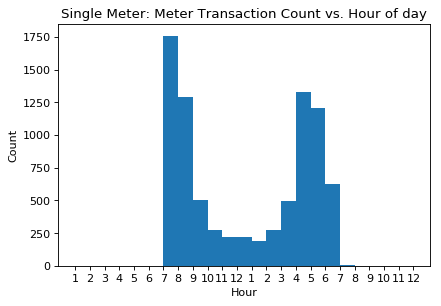

In [8]:
showHourlyHistogram(myFavMeterStartHour, dpi=80, title_str='Single Meter:')

Using all the meters gives us a model with less variance, but high bias towards commercial areas.

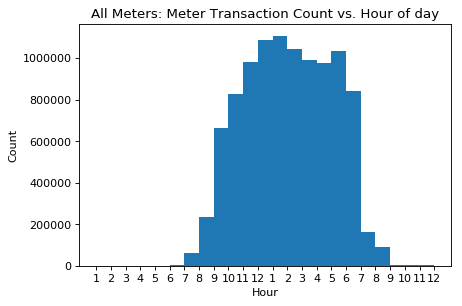

In [9]:
showHourlyHistogram(allMeterStartHour, dpi=80, title_str='All Meters:')

## <span style="color:red">Todo:</span> Introduce the idea that it might be good to cluster histograms by "type", then cluster by type before applying the model for that type. Hint at something like k-means.

## <span style="color:red">Todo:</span> Model validation "how do we know if we're making a bad model?" (cross-validation, r^2, maybe some trade-offs). 

## <span style="color:red">Todo:</span> Below is a brainstorming scratchpad for elsewhere. Not to be taken seriously. 

### Checking for bias is important when modeling

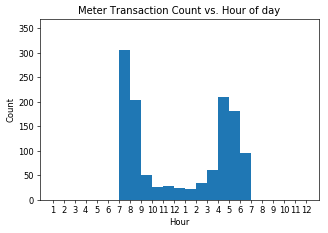

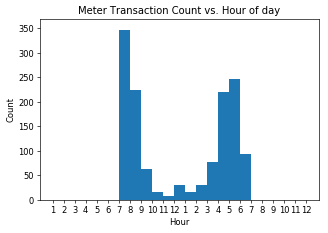

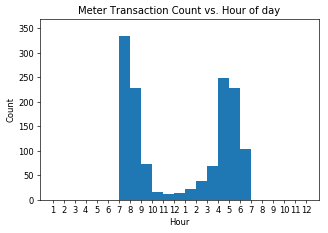

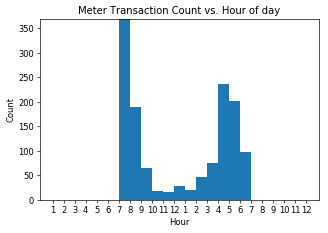

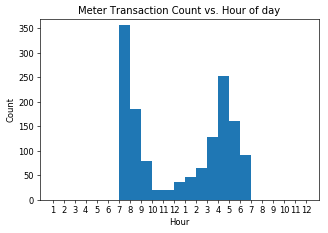

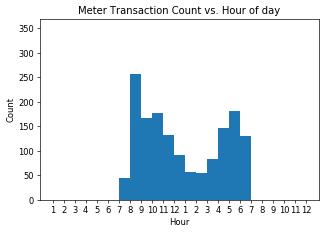

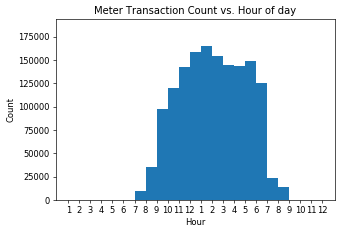

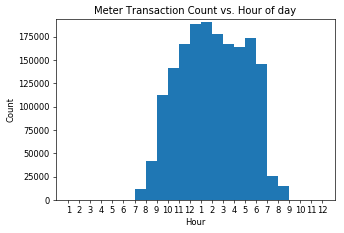

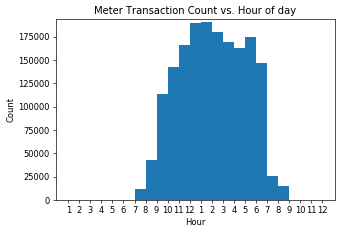

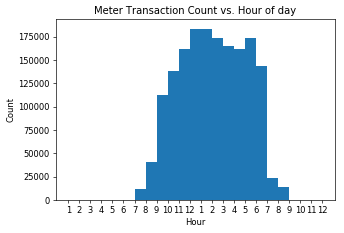

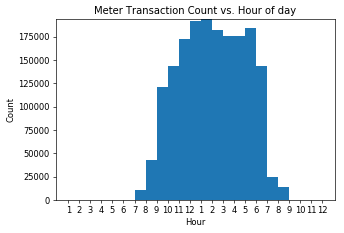

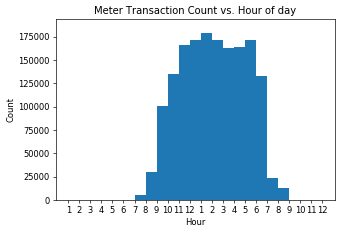

In [95]:
dayByDay = list()
mxs = list()
for i in range(6):
    tmp = convertToHours(meter0Start[meter0StartWeekday == i])
    mxs.append(max(np.bincount(tmp)))
    dayByDay.append(tmp)
    
mx = max(mxs)
for i in range(6):
    showHourlyHistogram(dayByDay[i], mx=mx, dpi=60)
    
    
dayByDay = list()
mxs = list()
for i in range(6):
    tmp = allTransactionsByHour[allTransactionsByWeekday == i]
    mxs.append(max(np.bincount(tmp)))
    dayByDay.append(tmp)
    
mx = max(mxs)
for i in range(6):
    showHourlyHistogram(dayByDay[i], mx=mx, dpi=60)

In [253]:
df_pole_locations = pd.read_csv(data_path + 'treas_parking_meters_loc_datasd.csv')

In [254]:
df_pole_locations[df_pole_locations['pole'] == myFavoriteMeter]

,zone,area,sub_area,pole,config_id,config_name,longitude,latitude
14,City,Barrio Logan,1800 MAIN ST,MN-1827,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.147804,32.699751


In [356]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_pole_locations)

,zone,area,sub_area,pole,config_id,config_name,longitude,latitude
0,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1003,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700353
1,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1005,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145178,32.700352
2,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1011,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145349,32.700155
3,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1013,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145405,32.700107
4,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1015,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145539,32.699987
5,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1017,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145540,32.699985
6,City,Barrio Logan,1000 CESAR CHAVEZ WAY,CC-1019,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145545,32.699981
7,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1103,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145973,32.699544
8,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1105,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.145973,32.699545
9,City,Barrio Logan,1100 CESAR CHAVEZ WAY,CC-1107,9000,2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.146065,32.699490
